# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

# 02. Importing dataframe

In [3]:
# Creating path first
path = r'/Users/jaksdt/Desktop/Data analytics stuff/Data immersion/Exercises 1 - 10/Section 6'

In [4]:
# Importing dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'citibike3.csv'), index_col = False)

In [5]:
df

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,zip_code
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,10018.0
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,10013.0
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,10019.0
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,10016.0
4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1976,Unknown,10122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,17988,Sat,18,2013-09-21 18:39:20,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,478,11 Ave & W 41 St,40.760301,-73.998842,2697,Non-Subscriber,1976,Unknown,10019.0
49973,18458,Sat,17,2013-09-14 17:32:26,261,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970,Female,11201.0
49974,15054,Sat,18,2013-09-07 18:08:21,402,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961,Female,10010.0
49975,16763,Sat,13,2013-09-07 13:25:35,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,373,Willoughby Ave & Walworth St,40.693317,-73.953820,2697,Non-Subscriber,1976,Unknown,11215.0


## The elbow technique

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bike_id                  49977 non-null  int64  
 1   weekday                  49977 non-null  object 
 2   start_hour               49977 non-null  int64  
 3   start_time               49977 non-null  object 
 4   start_station_id         49977 non-null  int64  
 5   start_station_name       49977 non-null  object 
 6   start_station_latitude   49977 non-null  float64
 7   start_station_longitude  49977 non-null  float64
 8   end_time                 49977 non-null  object 
 9   end_station_id           49977 non-null  int64  
 10  end_station_name         49977 non-null  object 
 11  end_station_latitude     49977 non-null  float64
 12  end_station_longitude    49977 non-null  float64
 13  trip_duration            49977 non-null  int64  
 14  subscriber            

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   bike_id                  49977 non-null  int64         
 1   weekday                  49977 non-null  object        
 2   start_hour               49977 non-null  int64         
 3   start_time               49977 non-null  datetime64[ns]
 4   start_station_id         49977 non-null  int64         
 5   start_station_name       49977 non-null  object        
 6   start_station_latitude   49977 non-null  float64       
 7   start_station_longitude  49977 non-null  float64       
 8   end_time                 49977 non-null  datetime64[ns]
 9   end_station_id           49977 non-null  int64         
 10  end_station_name         49977 non-null  object        
 11  end_station_latitude     49977 non-null  float64       
 12  end_station_longitude    49977 n

In [19]:
# Dropping all non-numerical columns
df_new = df.drop(columns = ['weekday', 'start_station_name', 'end_station_name', 'subscriber', 'gender', 'start_time', 'end_time'])

In [20]:
df_new

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,zip_code
0,16013,18,523,40.754666,-73.991382,334,40.742388,-73.997262,993,1968,10018.0
1,15230,18,257,40.719392,-74.002472,236,40.728419,-73.987140,581,1983,10013.0
2,17942,19,479,40.760193,-73.991255,513,40.768254,-73.988639,361,1989,10019.0
3,19683,11,527,40.743156,-73.974347,441,40.756014,-73.967416,561,1988,10016.0
4,18024,18,521,40.750450,-73.994811,476,40.743943,-73.979661,2296,1976,10122.0
...,...,...,...,...,...,...,...,...,...,...,...
49972,17988,18,479,40.760193,-73.991255,478,40.760301,-73.998842,2697,1976,10019.0
49973,18458,17,261,40.694749,-73.983625,151,40.721816,-73.997203,1191,1970,11201.0
49974,15054,18,402,40.740343,-73.989551,524,40.755273,-73.983169,1050,1961,10010.0
49975,16763,13,271,40.685282,-73.978058,373,40.693317,-73.953820,2697,1976,11215.0


In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bike_id                  49977 non-null  int64  
 1   start_hour               49977 non-null  int64  
 2   start_station_id         49977 non-null  int64  
 3   start_station_latitude   49977 non-null  float64
 4   start_station_longitude  49977 non-null  float64
 5   end_station_id           49977 non-null  int64  
 6   end_station_latitude     49977 non-null  float64
 7   end_station_longitude    49977 non-null  float64
 8   trip_duration            49977 non-null  int64  
 9   birth_year               49977 non-null  int64  
 10  zip_code                 48530 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 4.2 MB


In [24]:
# Checking for missing values due to Value error
df_new.isnull().sum()

bike_id                       0
start_hour                    0
start_station_id              0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
birth_year                    0
zip_code                   1447
dtype: int64

In [25]:
# Dropping zipcode column
df_new = df_new.drop(columns = ['zip_code'])

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bike_id                  49977 non-null  int64  
 1   start_hour               49977 non-null  int64  
 2   start_station_id         49977 non-null  int64  
 3   start_station_latitude   49977 non-null  float64
 4   start_station_longitude  49977 non-null  float64
 5   end_station_id           49977 non-null  int64  
 6   end_station_latitude     49977 non-null  float64
 7   end_station_longitude    49977 non-null  float64
 8   trip_duration            49977 non-null  int64  
 9   birth_year               49977 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 3.8 MB


In [27]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [29]:
score = [kmeans[i].fit(df_new).score(df_new) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

[-169381066459.26447,
 -64995945001.91594,
 -45290193261.74628,
 -38526097545.99878,
 -34519186851.90579,
 -30837595536.06484,
 -27507420628.602455,
 -25270477012.880493,
 -23195779972.927685]

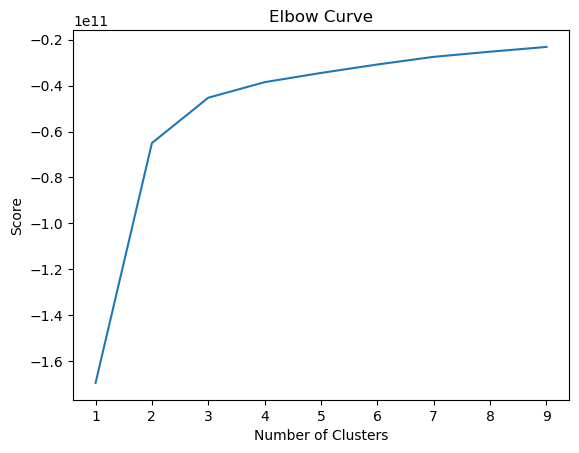

In [30]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## There is a big jump from 1 - 3 on the x-axis, but then the curve straightens out. This means that the optimal count for my clusters is three.

## k-means clustering

In [32]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [33]:
# Fit the k-means object to the data.

kmeans.fit(df_new)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [35]:
# Creating a new column in dataframe with corrosponding clusters
df_new['clusters'] = kmeans.fit_predict(df_new)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
df_new

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,clusters
0,16013,18,523,40.754666,-73.991382,334,40.742388,-73.997262,993,1968,1
1,15230,18,257,40.719392,-74.002472,236,40.728419,-73.987140,581,1983,1
2,17942,19,479,40.760193,-73.991255,513,40.768254,-73.988639,361,1989,0
3,19683,11,527,40.743156,-73.974347,441,40.756014,-73.967416,561,1988,2
4,18024,18,521,40.750450,-73.994811,476,40.743943,-73.979661,2296,1976,0
...,...,...,...,...,...,...,...,...,...,...,...
49972,17988,18,479,40.760193,-73.991255,478,40.760301,-73.998842,2697,1976,0
49973,18458,17,261,40.694749,-73.983625,151,40.721816,-73.997203,1191,1970,0
49974,15054,18,402,40.740343,-73.989551,524,40.755273,-73.983169,1050,1961,1
49975,16763,13,271,40.685282,-73.978058,373,40.693317,-73.953820,2697,1976,0


In [37]:
# Counting the clusters 
df_new['clusters'].value_counts()

clusters
2    17332
0    16499
1    16146
Name: count, dtype: int64

## Creating visualizations

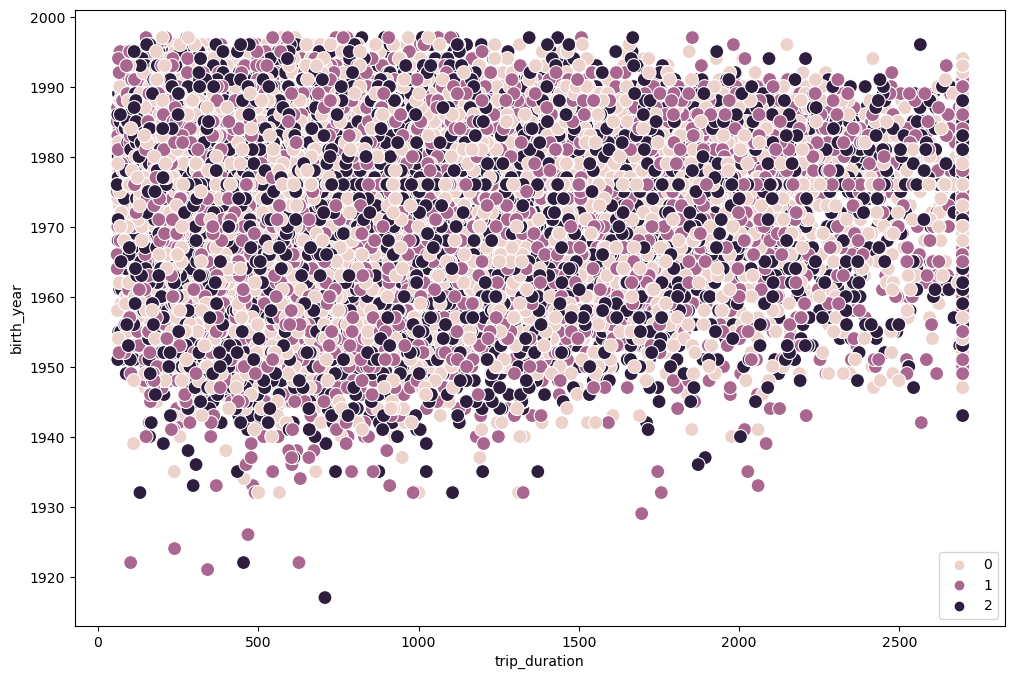

In [38]:
# Plot the clusters for the "trip_duration" and "birth_year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['trip_duration'], y=df_new['birth_year'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('trip_duration')
plt.ylabel('birth_year')
plt.show()

## There is absolutely no clustering. The only thing I can make out is a line consisting of data points that follows the same slight downward slope as the regression line from exercise 6.4.

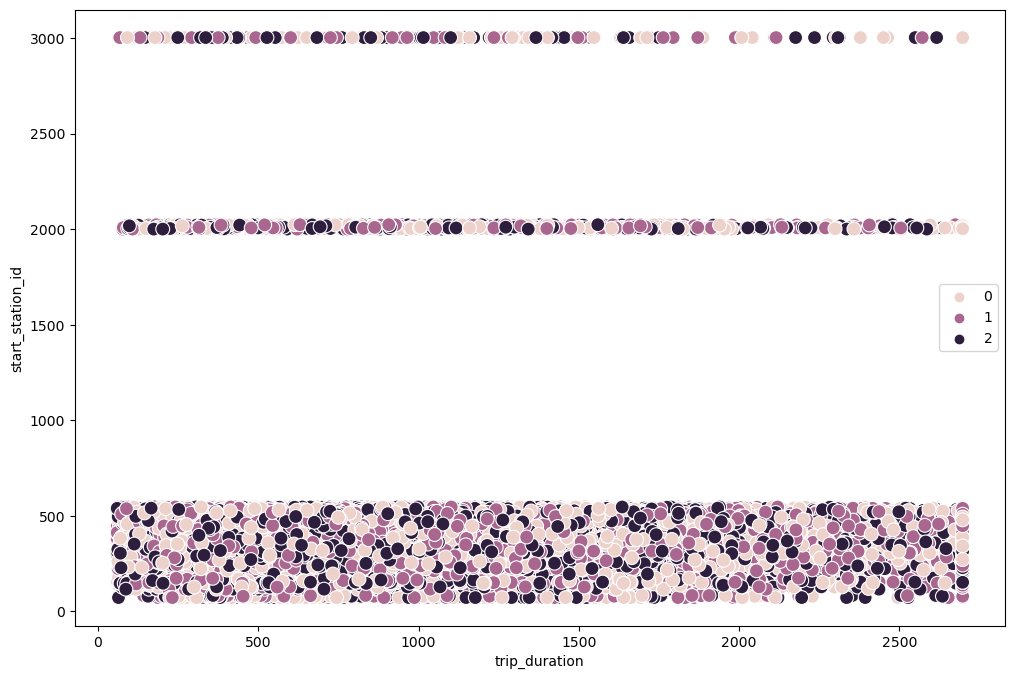

In [40]:
# Plot the clusters for the "trip_duration" and "start_station_id" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['trip_duration'], y=df_new['start_station_id'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('trip_duration')
plt.ylabel('start_station_id')
plt.show()

## There are now variables to plot in my data set

In [41]:
# Calculating desriptive statistics
df_new.loc[df_new['clusters'] == 2, 'cluster'] = 'dark purple'
df_new.loc[df_new['clusters'] == 1, 'cluster'] = 'purple'
df_new.loc[df_new['clusters'] == 0, 'cluster'] = 'pink'

In [42]:
df_new.groupby('cluster').agg({'trip_duration':['mean', 'median'], 
                         'birth_year':['mean', 'median'], 
                         'start_hour':['mean', 'median']})

trip_duration          birth_year         start_hour       
                     mean median         mean  median       mean median
cluster                                                                
dark purple    841.562255  672.0  1975.755539  1976.0  14.177360   15.0
pink           833.542639  669.0  1975.806352  1976.0  14.123523   15.0
purple         841.447417  676.0  1975.576366  1976.0  14.135390   15.0

## Trip duration averages are way higher than the median. That must mean that there are some very long trips that pushed the average up.

## Birth year averages and median are exactly the same and start hour differs slightly.

## As to what these results can be used for in future, trip duration tells us that the ave ride takes around 14min. Next we can calculate if subscribers or non subscribers take longer rides.

## The ave birth year for all riders is 1976, so 37 years old. (data is from 2013). Not sure what we can do with that.

## As to the scatter plots, they don't make sense, so not sure what we can do there either, please advise.